<h1><center>K-Nearest Neighbors</center></h1>

In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

In [1]:
import  numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [2]:
# loading the dataset
df = pd.read_csv('Customer_Membership_Prediction.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Visualisation and Analysis

In [3]:
# Now we will count the no. of labels under different categories
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

## So we got 
* 281-Plus Service
* 266-Basic Service
* 236-Total Service
* 217-E Service

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B34C13B48>]],
      dtype=object)

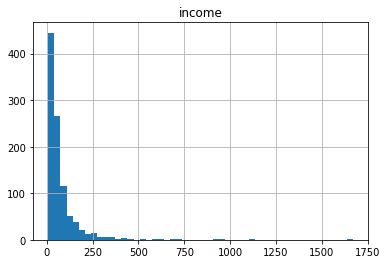

In [4]:
# visualising the data
df.hist(column='income',bins=50)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

## Defining the features sets X

In [6]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

## Defining the label y

In [7]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# Normalising  the data using Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification using KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

## Training the model

In [10]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [11]:
# Predicting
y_pred = neigh.predict(X_test)
y_pred[0:5]

array([3, 1, 3, 4, 4], dtype=int64)

## Accuracy Evaluation

In [12]:
from sklearn import metrics
print('Train Set Accuracy:', metrics.accuracy_score(y_train,neigh.predict(X_train)))
print('Test Set Accuracy:', metrics.accuracy_score(y_test,y_pred))

Train Set Accuracy: 0.55625
Test Set Accuracy: 0.26


In [13]:
# Building a classifier with k=6
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
print(y_pred[0:5])
print('Train Set Accuracy:', metrics.accuracy_score(y_train,neigh.predict(X_train)))
print('Test Set Accuracy:', metrics.accuracy_score(y_test,y_pred))

[4 4 1 3 4]
Train Set Accuracy: 0.495
Test Set Accuracy: 0.295


In [14]:
# for Ks=10
# training the model with different k to see which k would give us the best accuracy
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
mean_acc

array([0.275, 0.31 , 0.275, 0.26 , 0.3  , 0.295, 0.35 , 0.33 , 0.32 ])

## Plotting the model accuracy for different Number of Neighbors


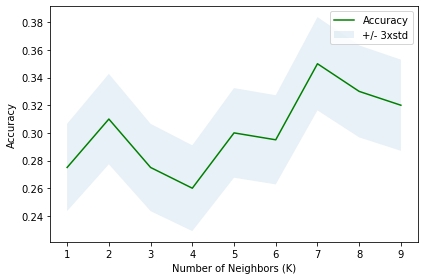

In [15]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.35 with k = 7
